## Code to read the predictions

In [60]:
from src.utils.analysis import LanguageModelAnalyzer, BaselineAnalyzer
import numpy as np

In [20]:
GPT2_PATH = "/Users/lukas/Desktop/projects/MIT/MIT_prosody/precomputed/predictions/relative/pred_gpt2_rel"
BERT_PATH = "/Users/lukas/Desktop/projects/MIT/MIT_prosody/precomputed/predictions/relative/pred_bert_rel"
GLOVE_PATH = "/Users/lukas/Desktop/projects/MIT/MIT_prosody/precomputed/predictions/relative/glove_histgrad"
DUMMY_PATH = "/Users/lukas/Desktop/projects/MIT/MIT_prosody/precomputed/predictions/relative/dummy"
AVG_PATH = (
    "/Users/lukas/Desktop/projects/MIT/MIT_prosody/precomputed/predictions/relative/avg"
)
WORDAVG_PATH = "/Users/lukas/Desktop/projects/MIT/MIT_prosody/precomputed/predictions/relative/wordavg"

In [24]:
gpt2_analyzer = LanguageModelAnalyzer(GPT2_PATH, batch_analysis=False)
bert_analyzer = LanguageModelAnalyzer(BERT_PATH, batch_analysis=False)
glove_analyzer = BaselineAnalyzer(GLOVE_PATH)
dummy_analyzer = BaselineAnalyzer(DUMMY_PATH)
avg_analyzer = BaselineAnalyzer(AVG_PATH)
wordavg_analyzer = BaselineAnalyzer(WORDAVG_PATH)

all lengths 4822 4822 4822 4822 4822 4822
all lengths 4822 4822 4822 4822 4822 4822
all lengths 4822 4822 4822
all lengths 4822 4822 4822
all lengths 4822 4822 4822
all lengths 4822 4822 4822


In [25]:
gpt2_error = gpt2_analyzer.compute_mse_over_dataset()
bert_error = bert_analyzer.compute_mse_over_dataset()
print(
    f"ERROR GPT2: {gpt2_error}, \nERROR BERT: {bert_error}, \nERROR GLOVE {glove_analyzer.compute_mse_over_dataset()}, \nERROR DUMMY {dummy_analyzer.compute_mse_over_dataset()}, \nERROR AVG {avg_analyzer.compute_mse_over_dataset()}, \nERROR WORDAVG {wordavg_analyzer.compute_mse_over_dataset()}"
)

ERROR GPT2: 0.4898397624492645, 
ERROR BERT: 0.48431211709976196, 
ERROR GLOVE 0.7529274508003854, 
ERROR DUMMY 3.388858541062465, 
ERROR AVG 1.0393289073384406, 
ERROR WORDAVG 0.7595377053634474


### Plot stats over sentence length

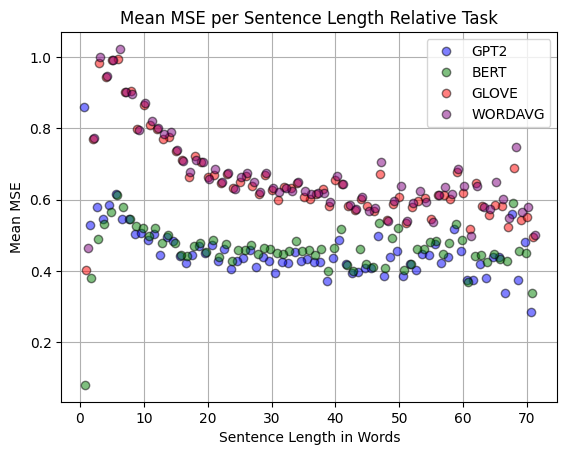

In [28]:
from src.utils.plots import plot_mean_mse

plot_mean_mse(
    [
        gpt2_analyzer,
        bert_analyzer,
        glove_analyzer,
        # dummy_analyzer,
        # avg_analyzer,
        wordavg_analyzer,
    ],
    [
        "GPT2",
        "BERT",
        "GLOVE",
        # "DUMMY",
        # "AVG",
        "WORDAVG",
    ],
    mode="sentence_length",
    error_bars=False,
    plot_title="Mean MSE per Sentence Length Relative Task",
    min_samples=1,
)

### Plot stats over word position

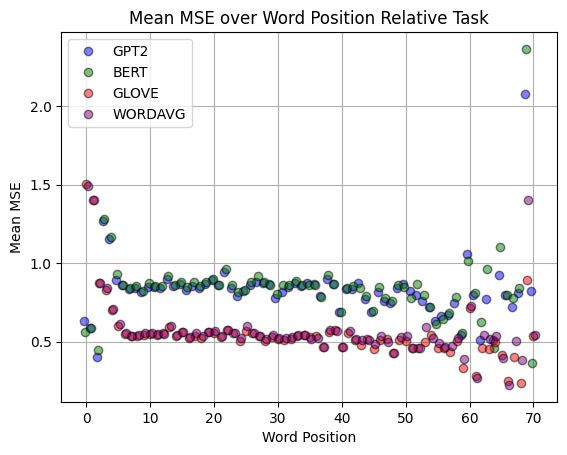

In [29]:
from src.utils.plots import plot_mean_mse

plot_mean_mse(
    [
        gpt2_analyzer,
        bert_analyzer,
        glove_analyzer,
        # dummy_analyzer,
        # avg_analyzer,
        wordavg_analyzer,
    ],
    [
        "GPT2",
        "BERT",
        "GLOVE",
        # "DUMMY",
        # "AVG",
        "WORDAVG",
    ],
    mode="word_position",
    error_bars=False,
    plot_title="Mean MSE over Word Position Relative Task",
    min_samples=1,
)

In [50]:
id = 115


examples = [31, 44, 94]

text = gpt2_analyzer.input_texts[id].split(" ")
print(text)
labels = gpt2_analyzer.labels[id][gpt2_analyzer.get_loss_mask(id) == 1]
print(f"label length: {len(labels)}")

gpt2_preds = gpt2_analyzer.get_pred(id)[gpt2_analyzer.get_loss_mask(id) == 1]
bert_preds = bert_analyzer.get_pred(id)[bert_analyzer.get_loss_mask(id) == 1]
glove_preds = glove_analyzer.get_pred(id)
# print(glove_preds)
glove_text = glove_analyzer.input_texts[id].split(" ")
print(f"glove text length: {glove_text}")
avg_preds = avg_analyzer.get_pred(id)
wordavg_preds = wordavg_analyzer.get_pred(id)
dummy_preds = dummy_analyzer.get_pred(id)
print(
    f"lengths of preds: {len(gpt2_preds)}, {len(bert_preds)}, {len(glove_preds)}, {len(avg_preds)}, {len(wordavg_preds)}, {len(dummy_preds)}"
)

['He', 'drew', 'forth', 'a', 'phrase', 'from', 'his', 'treasure', 'and', 'spoke', 'it', 'softly', 'to', 'himself']
label length: 14
glove text length: ['he', 'drew', 'forth', 'a', 'phrase', 'from', 'his', 'treasure', 'and', 'spoke', 'it', 'softly', 'to', 'himself']
lengths of preds: 14, 14, 14, 14, 14, 14


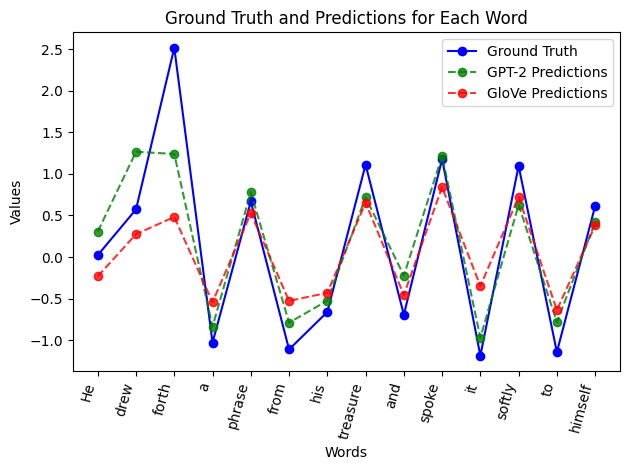

In [51]:
from src.utils.plots import plot_ground_truth_and_predictions

plot_ground_truth_and_predictions(
    text,
    labels,
    [
        gpt2_preds,
        # bert_preds,
        glove_preds,
        # avg_preds,
        # wordavg_preds,
        # dummy_preds,
    ],
    [
        "GPT-2",
        # "BERT",
        "GloVe",
        # "AVG",
        # "WORDAVG",
        # "DUMMY",
    ],
)

In [53]:
from src.utils.text_processing import get_part_of_speech

word = "running"
pos = get_part_of_speech(word)
print(f"The part of speech for '{word}' is {pos}")

The part of speech for 'running' is VBG


In [90]:
# iterate over the predictions and compute the error per part of speech
from tqdm import tqdm
from src.utils.text_processing import get_part_of_speech

gpt2_pos_error = {}
gpt2_pos_std = {}
bert_pos_error = {}
bert_pos_std = {}

for i in range(len(gpt2_analyzer.input_texts)):
    text = gpt2_analyzer.input_texts[i].split(" ")
    labels = gpt2_analyzer.labels[i][gpt2_analyzer.get_loss_mask(i) == 1]
    gpt2_preds = gpt2_analyzer.get_pred(i)[gpt2_analyzer.get_loss_mask(i) == 1]
    bert_preds = bert_analyzer.get_pred(i)[bert_analyzer.get_loss_mask(i) == 1]
    for j in range(len(text)):
        pos = get_part_of_speech(text[j])
        if pos not in gpt2_pos_error:
            gpt2_pos_error[pos] = []
            bert_pos_error[pos] = []
        gpt2_pos_error[pos].append((gpt2_preds[j] - labels[j]) ** 2)
        bert_pos_error[pos].append((bert_preds[j] - labels[j]) ** 2)

for pos in gpt2_pos_error:
    gpt2_pos_std[pos] = np.std(gpt2_pos_error[pos])
    bert_pos_std[pos] = np.std(bert_pos_error[pos])
    gpt2_pos_error[pos] = np.mean(gpt2_pos_error[pos])
    bert_pos_error[pos] = np.mean(bert_pos_error[pos])


print(gpt2_pos_error)
print(gpt2_pos_std)
print(bert_pos_error)
print(bert_pos_std)

{'PRP': 0.4247967530977678, 'VBD': 0.3739946897082575, 'RB': 0.6924774054725155, 'MD': 0.48321984849758703, 'VB': 0.5249888932945458, 'NN': 0.6047499301376239, 'IN': 0.2517241100849197, 'NNS': 0.596230284917334, 'CC': 0.2817126739609843, 'VBN': 0.5542977792657281, 'TO': 0.1316822904900511, 'PRP$': 0.2626850997908678, 'DT': 0.21677124456296323, 'JJ': 0.5644352375143105, 'VBG': 0.5631489693245914, 'CD': 0.5675771102291032, 'NNP': 0.5959374948089218, 'VBZ': 0.4044888644132356, 'WRB': 0.5124381835747382, 'WP': 0.5117400427372785, 'RBR': 0.5807043739532098, 'WDT': 0.3690490104290626, 'JJS': 0.6589032917115588, 'WP$': 0.5022729203551476, 'VBP': 0.4304554572138231, 'UH': 0.851825073274173, 'JJR': 0.496064527066005, 'EX': 0.9226200338630753, "''": 0.8151120429641953, 'POS': 1.2883116595146802, ',': 1.1127656197223526, ':': 0.8441634229171733, '.': 5.288168564381318}
{'PRP': 1.118883691880393, 'VBD': 0.7828042190980129, 'RB': 1.1006341455111162, 'MD': 0.9254123415039704, 'VB': 0.992510682191035

In [87]:
glove_pos_error = {}
glove_pos_std = {}

for i in range(240):
    text = glove_analyzer.input_texts[i].split(" ")
    labels = glove_analyzer.labels[i]
    glove_preds = glove_analyzer.get_pred(i)
    for j in range(len(text)):
        pos = get_part_of_speech(text[j])
        if pos not in glove_pos_error:
            glove_pos_error[pos] = []
        glove_pos_error[pos].append((glove_preds[j] - labels[j]) ** 2)

for pos in glove_pos_error:
    glove_pos_error[pos] = np.mean(glove_pos_error[pos])
    glove_pos_std[pos] = np.std(glove_pos_error[pos])

print(glove_pos_error)

{'PRP': 0.4337230665962773, 'VBD': 0.6771348718804836, 'RB': 0.8342477856267373, 'MD': 0.5917723987344984, 'VB': 0.4978016474359932, 'NN': 0.6847646478503514, 'IN': 0.4397880175226376, 'NNS': 0.6426016533673056, 'CC': 0.47947541527470416, 'VBN': 0.6698993289814477, 'TO': 0.2278944721320786, 'PRP$': 0.5514328571009297, 'DT': 0.3036367908701023, 'JJ': 0.5693468868179369, 'VBG': 0.5512870447232522, 'CD': 0.6450691562023806, 'VBZ': 0.5459965943502642, 'WRB': 1.3323879632775666, 'WP': 0.7731843919291813, 'RBR': 0.44914252614145217, 'WDT': 0.4218673459061647, 'JJS': 0.681664197073055, 'WP$': 1.5243985237522457, 'VBP': 0.4980802307259791, 'JJR': 0.39074263027071865}


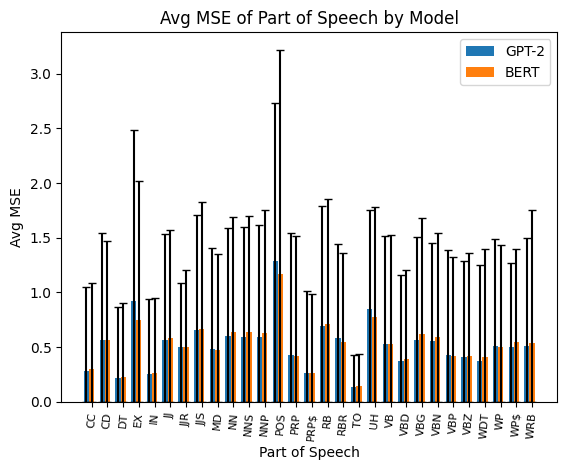

In [93]:
import matplotlib.pyplot as plt
import numpy as np


def plot_data(models, model_names=None, model_std_devs=None):
    pos_tags = [
        "CC",
        "CD",
        "DT",
        "EX",
        "FW",
        "IN",
        "JJ",
        "JJR",
        "JJS",
        "LS",
        "MD",
        "NN",
        "NNS",
        "NNP",
        "NNPS",
        "PDT",
        "POS",
        "PRP",
        "PRP$",
        "RB",
        "RBR",
        "RBS",
        "RP",
        "SYM",
        "TO",
        "UH",
        "VB",
        "VBD",
        "VBG",
        "VBN",
        "VBP",
        "VBZ",
        "WDT",
        "WP",
        "WP$",
        "WRB",
    ]

    n_models = len(models)
    pos_tags_with_error = [
        pos_tag
        for pos_tag in pos_tags
        if any(model.get(pos_tag, 0) > 0 for model in models)
    ]

    # Calculate the bar width and positions
    bar_width = 1 / (n_models + 1)
    positions = [
        np.arange(len(pos_tags_with_error)) + i * bar_width for i in range(n_models)
    ]

    # Create the bar plot
    fig, ax = plt.subplots()
    for i, model in enumerate(models):
        values = [model.get(pos_tag, 0) for pos_tag in pos_tags_with_error]
        label = f"Model {i + 1}" if model_names is None else model_names[i]

        if model_std_devs is not None:
            std_devs = [
                model_std_devs[i].get(pos_tag, 0) for pos_tag in pos_tags_with_error
            ]
            lower_error = [
                min(std_dev, value) for std_dev, value in zip(std_devs, values)
            ]
            upper_error = std_devs
            error_bars = [lower_error, upper_error]
        else:
            error_bars = None

        ax.bar(
            positions[i],
            values,
            width=bar_width,
            label=label,
            yerr=error_bars,
            capsize=3,
        )

    # Customize the plot
    ax.set_xticks(positions[int(n_models / 2)])
    ax.set_xticklabels(pos_tags_with_error, rotation=85, fontsize=8)
    ax.set_xlabel("Part of Speech")
    ax.set_ylabel("Avg MSE")
    ax.set_title("Avg MSE of Part of Speech by Model")
    ax.legend()

    # Show the plot
    plt.show()


plot_data(
    [gpt2_pos_error, bert_pos_error], ["GPT-2", "BERT"], [gpt2_pos_std, bert_pos_std]
)